In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from os import makedirs
from os import listdir
import os
from shutil import copyfile

import cv2
from PIL import Image

from random import seed
from random import random

In [2]:
dataset_home = 'dataset_train_valid_test/' # name of diretories
subdirs = ['train/', 'valid/','test/'] # sub diretories
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['cocci/', 'healthy/','ncd/', 'salmo']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [3]:
# seed random number generator
seed(42)

# define ratio of pictures to divide 
# train:80/test:10/valid:10 
val_ratio_1 = 0.2 # divide 80/20 of all data 
val_ratio_2 = 0.5 # divide 50/50 of divided 20% all data

In [4]:
import os
import shutil
from random import random

src_directory = 'all'  # Path to directory containing all data
dataset_home = 'dataset_train_valid_test/'  # Destination directory


# Function to determine destination directory based on random ratios
def get_destination_dir():
    if random() < val_ratio_1:
        if random() < val_ratio_2:
            return 'test'
        else:
            return 'valid'
    else:
        return 'train'

# Iterate over files in the source directory
for dirpath, dirnames, filenames in os.walk(src_directory):
    for file in filenames:
        # Get destination directory
        dst_dir = get_destination_dir()
        # Get source and destination paths
        src_path = os.path.join(dirpath, file)
        dst_path = os.path.join(dataset_home, dst_dir, os.path.basename(dirpath), file)
        # Create destination directory if it doesn't exist
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        # Copy the file
        shutil.copy(src_path, dst_path)


# Image augmentation

In [5]:
train_cocci = len(listdir('dataset_train_valid_test/train/cocci/'))
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
train_healthy = len(listdir('dataset_train_valid_test/train/healthy/'))
train_salmo = len(listdir('dataset_train_valid_test/train/salmo/'))
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
#class imbalance in ncd
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 1708
Train dataset ncd class : 303
Train dataset healthy class : 1623
Train dataset salmo class : 1824


In [6]:
import cv2
import numpy as np
from os import listdir

# Define functions for image augmentation

def horizontal_flip(image):
    return cv2.flip(image, 1)

def shift_scale_rotate(image):
    rows, cols, _ = image.shape
    # Shift
    dx = np.random.uniform(-0.0625 * cols, 0.0625 * cols)
    dy = np.random.uniform(-0.0625 * rows, 0.0625 * rows)
    # Scale
    scale = np.random.uniform(0.9, 1.1)
    # Rotation
    angle = np.random.uniform(-45, 45)
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, scale)
    M[:, 2] += [dx, dy]
    return cv2.warpAffine(image, M, (cols, rows))

def add_gaussian_noise(image):
    mean = 0
    var = np.random.uniform(100, 200)
    sigma = var ** 0.5
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return cv2.add(image, gaussian)

# Define source directory
src_directory = "dataset_train_valid_test/train/ncd/"

# Loop through each image file in the directory
for file in listdir(src_directory):
    image = cv2.imread(src_directory + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply transformations
    transformed_flip = horizontal_flip(image)
    transformed_shift = shift_scale_rotate(image)
    transformed_noise = add_gaussian_noise(image)
    
    # Save transformed images
    cv2.imwrite(src_directory + file[:-4] + "_flip.jpg", cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
    cv2.imwrite(src_directory + file[:-4] + "_shift.jpg", cv2.cvtColor(transformed_shift, cv2.COLOR_RGB2BGR))
    cv2.imwrite(src_directory + file[:-4] + "_noise.jpg", cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))



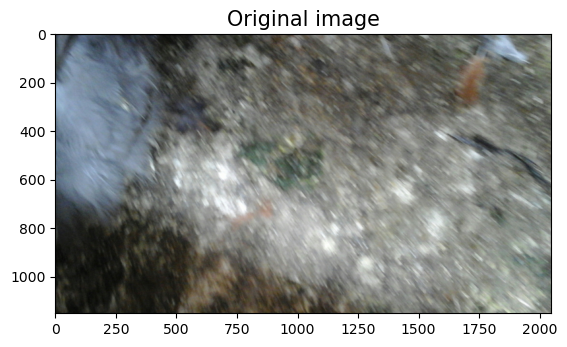

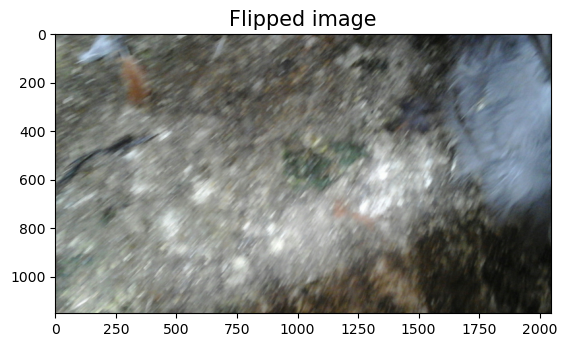

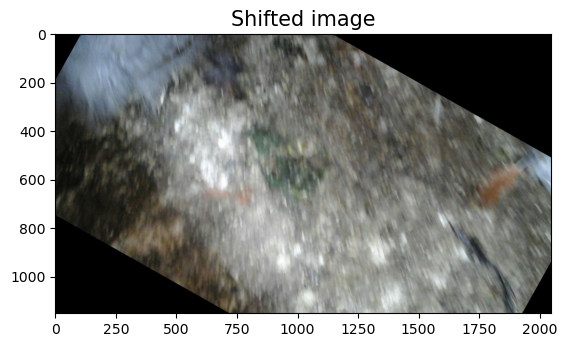

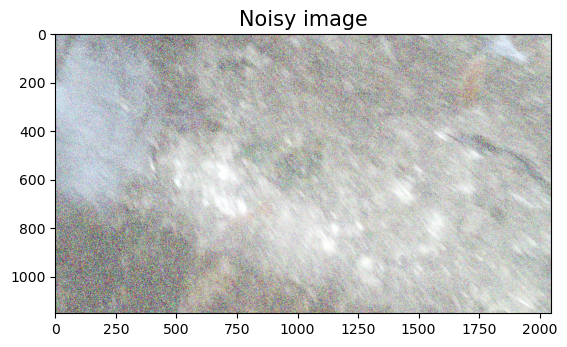

In [7]:
# Show original and transformed images
plt.imshow(image)
plt.title("Original image", size=15)
plt.show()
plt.imshow(transformed_flip)
plt.title("Flipped image", size=15)
plt.show()
plt.imshow(transformed_shift)
plt.title("Shifted image", size=15)
plt.show()
plt.imshow(transformed_noise)
plt.title("Noisy image", size=15)
plt.show()

In [8]:
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 1708
Train dataset ncd class : 1212
Train dataset healthy class : 1623
Train dataset salmo class : 1824
